## EE 242 Lab 3

Jizhe Lian, Ethan Jiang, Jasper Chen
(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
import numpy as np
import cmath
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Assignment1:
def fun(t, a_k, f_0):  #f_0 fundamental freq
    x = a_k[0]
    w = 2*np.pi*f_0
    
    for k in range (1, len(a_k)):
        x = x + 2 * np.abs(a_k[k])*np.cos(k*w*t+np.angle(a_k[k]))
    return x

In [3]:
def sawtooth_co(N): #2
    y = np.ones(N+1, dtype = complex) #3
    y[0] = 0.5
    for x in range (1, N+1):
        y[x] = (1/(1j*2*np.pi*x))

    return y

In [4]:
def triangle_signal(N): #2
    y = np.ones(N+1, dtype = complex) #3
    y[0] = 0.5
    for x in range (1, N+1):
        y[x] = (2*np.sin(x*np.pi/2)/(1j*(x*np.pi)**2)*np.exp(-1j*2*x*(np.pi)/2))
    return y

In [5]:
T = 0.2    #200ms
fs = 8000
t = np.arange(0, T+1/fs, 1/fs)
print(t.shape)

(1601,)


In [6]:
Nsaw_5 = sawtooth_co(5)
Nsaw_20 = sawtooth_co(20)
Nsaw_2 = Nsaw_5[:3]
print(Nsaw_5.shape)


x_N2 = fun(t, Nsaw_2, 20).real
x_N5 = fun(t, Nsaw_5, 20).real
x_N20 = fun(t, Nsaw_20, 20).real

(6,)


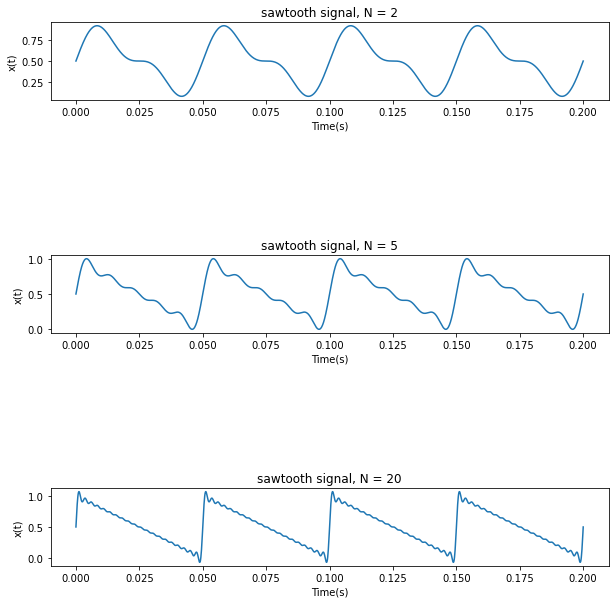

In [7]:
fig = plt.figure(1, figsize=(10,10))
# plot parameter set 1
plt.subplot(311) 
plt.plot(t, x_N2)
plt.title('sawtooth signal, N = 2')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')


# plot parameter set 2
plt.subplot(312) 
plt.plot(t, x_N5)
plt.title('sawtooth signal, N = 5')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')

# plot parameter set 3
plt.subplot(313) 
plt.plot(t, x_N20)
plt.title('sawtooth signal, N = 20')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

In [8]:

Ntri_20 = triangle_signal(20)
Ntri_5 = Ntri_20[:6]
Ntri_2 = Ntri_20[:3]


x_tri_N2  = fun(t, Ntri_2, 20).real
x_tri_N5  = fun(t, Ntri_5, 20).real
x_tri_N20 = fun(t, Ntri_20, 20).real

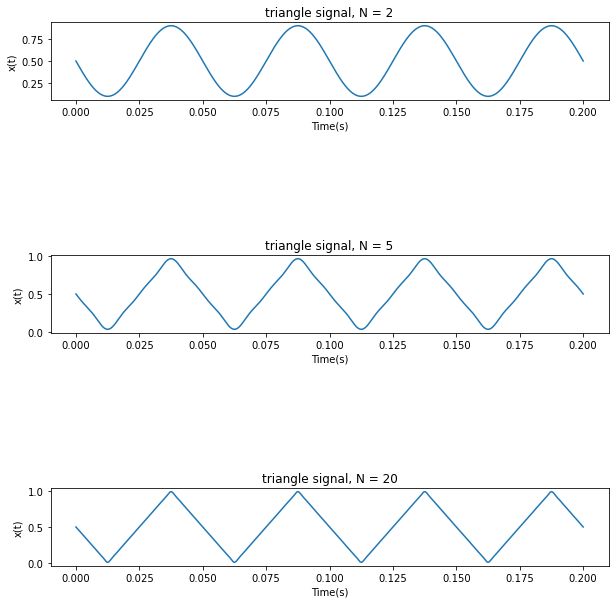

In [9]:
fig = plt.figure(2, figsize=(10,10))
# plot parameter set 1
plt.subplot(311) 
plt.plot(t, x_tri_N2)
plt.title('triangle signal, N = 2')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')


# plot parameter set 2
plt.subplot(312) 
plt.plot(t, x_tri_N5)
plt.title('triangle signal, N = 5')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')

# plot parameter set 3
plt.subplot(313) 
plt.plot(t, x_tri_N20)
plt.title('triangle signal, N = 20')
plt.xlabel('Time(s)')
plt.ylabel('x(t)')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

Discussion 1:

1. The energy of the second signal decays more faster than the first one because the cofficent of triangle signal has a power of 2 in the denominator. With less energy, the function would be more close to linear. Therefore, the second signal would converge faster. 

2. Due to the Gibbs phenomenon, as the signal has a larger angle to the connection, it would need more N to converge. Therefore, the second signal would converge faster. 





In [10]:
# Assignment2: 
import simpleaudio as sa
from scipy.io import wavfile as wav

fs, horn_mag = wav.read('horn11short.wav')

starting_index = round(0.2*fs)
ending_index = round(0.3*fs)
x1 = horn_mag[starting_index:ending_index + 1]



In [11]:
T = 0.1   #100ms
t = np.arange(0, T+1/fs, 1/fs) # new time vector of length 100ms
t = t + 0.2  # t starts at 0.2s, end at 0.3s
f0 = 335
w0 = 2*np.pi*f0

y = lambda t: np.sin(w0*t)
x = y(t)* 32767 # # NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
wav.write('sine.wav', fs, x.copy().astype('int16'))


In [12]:
sine_obj = sa.WaveObject.from_wave_file('sine.wav')     # Load audio file
fs1 = sine_obj.sample_rate                                  # Extract sampling frequency
channels = sine_obj.num_channels

print('Sampling rate of sine: ' + str(fs1) + 'Hz')
sine_obj.play()


Sampling rate of sine: 11025Hz


In [13]:
ak_abs = [2688, 1900, 316, 178, 78, 38]
ak_phase =  [-1.73, -1.45, 2.36, 2.30, -2.30, 1.13]
ak_abs = np.array(ak_abs)
ak_phase = np.array(ak_phase)
ak = np.ones(len(ak_abs), dtype = complex) #3
ak = ak_abs * np.exp(1j*ak_phase)
ak = np.concatenate([[0],ak])


In [14]:
x2 = fun(t, ak, f0).real
print(x2)
print(len(x2))


[-1151.65358498  1013.49402776  3331.6476544  ...   950.02475294
  1481.71004387  1773.81026837]
1104


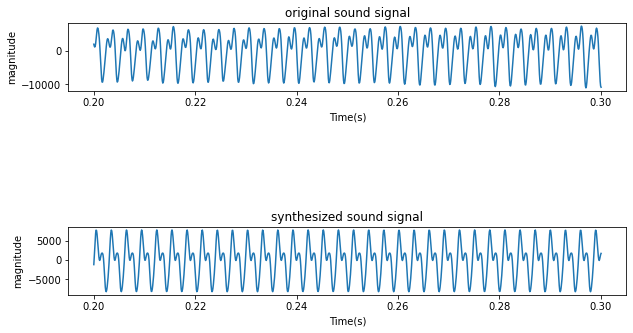

In [15]:
fig = plt.figure(3, figsize=(10,5))
# plot parameter set 1
plt.subplot(211) 
plt.plot(t, x1)
plt.title('original sound signal')
plt.xlabel('Time(s)')
plt.ylabel('magnitude')


# plot parameter set 2
plt.subplot(212) 
plt.plot(t, x2)
plt.title('synthesized sound signal')
plt.xlabel('Time(s)')
plt.ylabel('magnitude')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()



In [16]:
wav.write('origin.wav', fs, x1.copy().astype('int16'))
wav.write('systhesized.wav', fs, x2.copy().astype('int16'))

wav_origin =  sa.WaveObject.from_wave_file('horn11short.wav')
wav_origin_cut =  sa.WaveObject.from_wave_file('origin.wav')
wav_single_tone = sa.WaveObject.from_wave_file('sine.wav')
wav_6_tone = sa.WaveObject.from_wave_file('systhesized.wav')

wav_origin.play().wait_done()
wav_origin_cut.play().wait_done()
wav_single_tone.play().wait_done()
wav_6_tone.play()



Discussion2:

I think the difference is because the given Fourier coefficient is not exactly as same as the original coefficient because the original coefficients could have more than 6 values. Moreover, the given coefficient is approximately close to the real coefficient, but it still exists some residual that makes the graph looks different. 



In [17]:
# Assignment: 3
x3 = x1[:1024]

print(x3)
print(len(x3))

[2004 1445 1151 ...  332  521 1439]
1024


512
1024
[-512 -511 -510 ...  509  510  511]
0


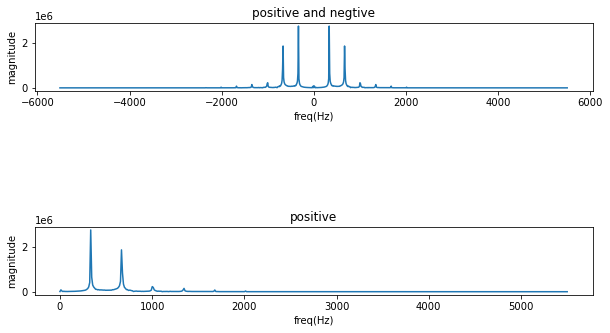

In [18]:
xhf = np.fft.fft(x3)
xhf2 = np.fft.fftshift(xhf)
po_ne = np.abs(xhf2)
positive = po_ne[512:]
print(len(positive))

w = np.arange(-512,512,1)
print(len(w))
print(w)
print(w[512])

fig = plt.figure(4, figsize=(10,5))
# plot parameter set 1
plt.subplot(211) 
plt.plot(w* 11025/1024, po_ne)
plt.title('positive and negtive')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')


# plot parameter set 2
plt.subplot(212) 
plt.plot(w[512:]* 11025/1024, positive)
plt.title('positive')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

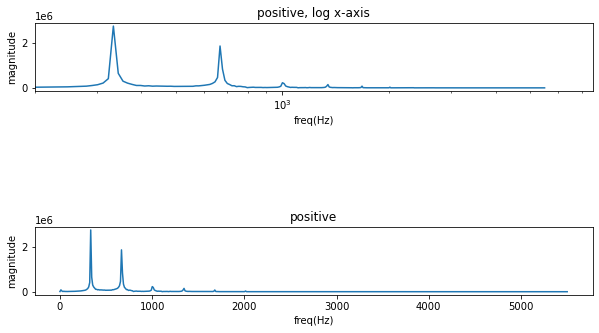

In [19]:
fig = plt.figure(5, figsize=(10,5))

plt.subplot(211) 
plt.plot(w[512:]* 11025/1024, positive)
plt.title('positive, log x-axis')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')
plt.xlim(200)

plt.subplot(212) 
plt.plot(w[512:]* 11025/1024, positive)
plt.title('positive')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

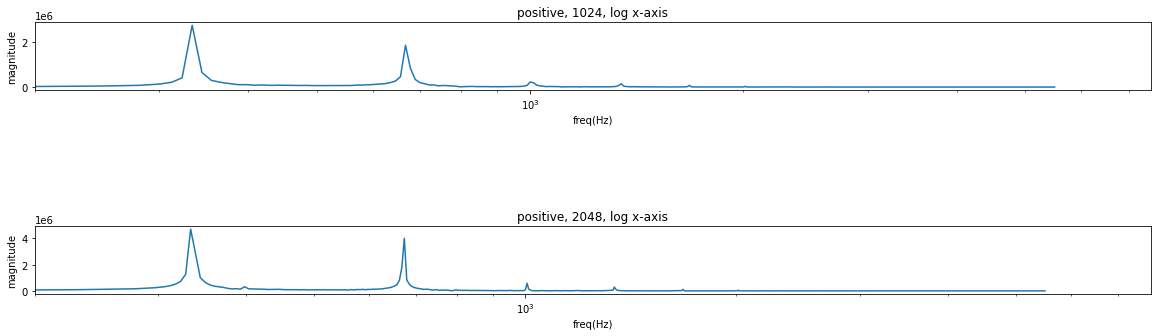

In [20]:
x4 = horn_mag[starting_index:starting_index + 2048]

xhf_1 = np.fft.fft(x4)
xhf2_1 = np.fft.fftshift(xhf_1)
po_ne_1 = np.abs(xhf2_1)
positive_1 = po_ne_1[1024:]


w_1 = np.arange(-1024,1024,1)

fig = plt.figure(6, figsize=(20,5))

# plot parameter set 1
plt.subplot(211) 
plt.plot(w[512:]* 11025/1024, positive)
plt.title('positive, 1024, log x-axis')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')
plt.xlim(200)

# plot parameter set 2
plt.subplot(212) 
plt.plot(w_1[1024:] * 11025/2048, positive_1)
plt.title('positive, 2048, log x-axis')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')
plt.xlim(200)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

Discussion3:

The result of FFT is more depend on the interval between frq samples, if the freq sample interval is very small, that close to 0, the result would be similar to the original signal. However, if the freq sample freq is very large, the result would be less accurate. 

16000
55000


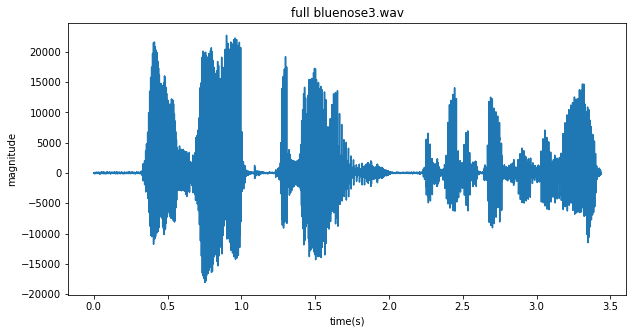

In [21]:
# Assignment 4
fs, bluenose3_mag = wav.read('bluenose3.wav')
print(fs)
print(len(bluenose3_mag))
t = np.arange(0,len(bluenose3_mag)/fs, 1/fs)

fig = plt.figure(7, figsize=(10,5))

# plot parameter set 1
plt.subplot(111) 
plt.plot(t, bluenose3_mag)
plt.title('full bluenose3.wav')
plt.xlabel('time(s)')
plt.ylabel('magnitude')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

bluenose3 = sa.WaveObject.from_wave_file('bluenose3.wav')
bluenose3.play()


12000


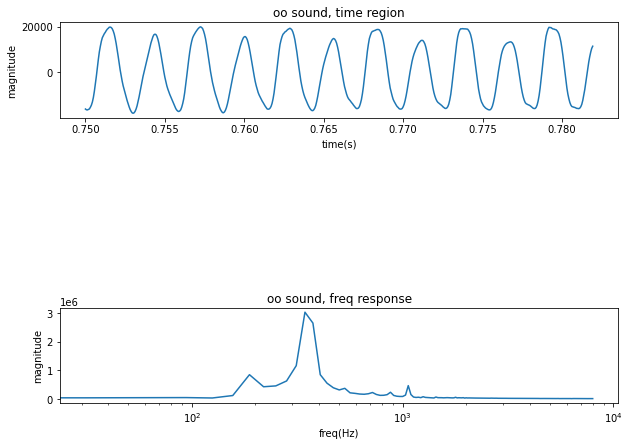

In [22]:
start_ind = round(0.75*16000)
print(start_ind)

sig_oo = bluenose3_mag[start_ind:start_ind+512]
t_oo = t[start_ind:start_ind+512]

sig_oo_xhf = np.fft.fft(sig_oo)
sig_oo_xhf2 = np.fft.fftshift(sig_oo_xhf)
sig_oo_xhf2 = np.abs(sig_oo_xhf2)
sig_oo_positive = sig_oo_xhf2[256:]

w_oo = np.arange(0,256,1)*fs/512

fig = plt.figure(8, figsize=(10,7))

# plot parameter set 1
plt.subplot(211) 
plt.plot(t_oo, sig_oo)
plt.title('oo sound, time region')
plt.xlabel('time(s)')
plt.ylabel('magnitude')

# plot parameter set 2
plt.subplot(212) 
plt.plot(w_oo, sig_oo_positive)
plt.title('oo sound, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

41040


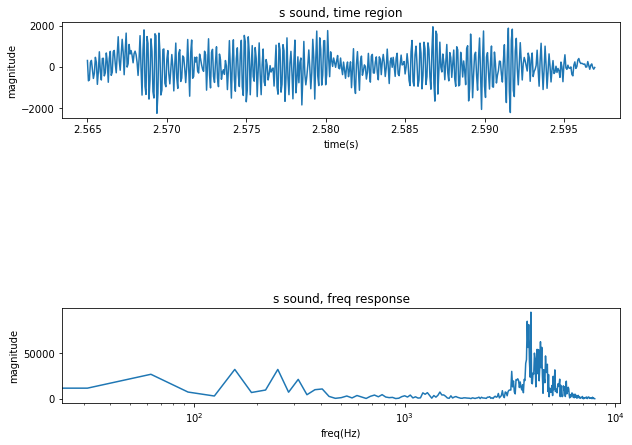

In [23]:
start_ind = round(2.565*16000)
print(start_ind)

sig_s = bluenose3_mag[start_ind:start_ind+512]
t_s = t[start_ind:start_ind+512]

sig_s_xhf = np.fft.fft(sig_s)
sig_s_xhf2 = np.fft.fftshift(sig_s_xhf)
sig_s_xhf2 = np.abs(sig_s_xhf2)
sig_s_positive = sig_s_xhf2[256:]

w_s = np.arange(0,256,1)*fs/512

fig = plt.figure(9, figsize=(10,7))

# plot parameter set 1
plt.subplot(211) 
plt.plot(t_s, sig_s)
plt.title('s sound, time region')
plt.xlabel('time(s)')
plt.ylabel('magnitude')

# plot parameter set 2
plt.subplot(212) 
plt.plot(w_s, sig_s_positive)
plt.title('s sound, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

discussion4: 

I chose 512 as mysize FFT because with a time range of 30ms and fs = 16000, the size of N would be 480, and 512 is the closest number that is the power of two. 

The oo sound is more likly to be an periodic signal, therefore the freq response has a few meanful frequency that could tell the behavior of the sound. 

One the other hand, s sound has a lot of noise, so there would be more significant frequencies in the freq domain to indicate the behavior of the sound. 